In [360]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [361]:
nba = pd.read_csv('C:\\Users\Lenovo\Downloads\\nba_players.csv')
nba.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [362]:
nba['potential_player'].value_counts()

0    10690
1      455
Name: potential_player, dtype: int64

In [363]:
list_item = []
for col in nba.columns:
    list_item.append([col, nba[col].dtype, nba[col].isna().sum(), round((nba[col].isna().sum()/len(nba[col]))*100,2),
                      nba[col].nunique(), list(nba[col].unique()[:5])])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [364]:
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,player_name,object,0,0.0,2235,"[Dennis Rodman, Dwayne Schintzius, Earl Cureto..."
1,team_abbreviation,object,0,0.0,36,"[CHI, LAC, TOR, DAL, MIA]"
2,age,float64,0,0.0,27,"[36.0, 28.0, 39.0, 24.0, 34.0]"
3,player_height,float64,0,0.0,30,"[198.12, 215.9, 205.74, 203.2, 200.66]"
4,player_weight,float64,0,0.0,157,"[99.79024, 117.93392, 95.25432, 100.697424, 10..."
5,college,object,0,0.0,316,"[Southeastern Oklahoma State, Florida, Detroit..."
6,country,object,0,0.0,76,"[USA, Congo, Nigeria, Lithuania, Canada]"
7,draft_year,object,0,0.0,45,"[1986, 1990, 1979, 1995, 1985]"
8,draft_round,object,0,0.0,8,"[2, 1, 3, Undrafted, 4]"
9,draft_number,object,0,0.0,75,"[27, 24, 58, 9, 10]"


## Didapat dari tabel di atas bahwa tidak ada data NaN/Null

# Feature Selection

### Dilakukan pemilihan fitur dilihat dari nilai korelasinya. Nilai korelasi minimal yang diambil di sini adalah 0.2

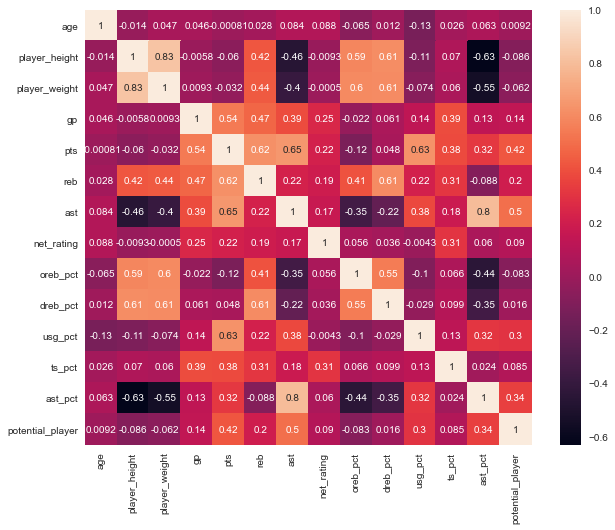

In [472]:
plt.figure(figsize=(10,8))
sns.heatmap(nba.corr(),annot=True)
plt.show()

In [366]:
def correlation_ratio(categories, measurements):
    
    def convert(data, to):
        converted = None
        if to == 'array':
            if isinstance(data, np.ndarray):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values
            elif isinstance(data, list):
                converted = np.array(data)
            elif isinstance(data, pd.DataFrame):
                converted = data.as_matrix()
        elif to == 'list':
            if isinstance(data, list):
                converted = data
            elif isinstance(data, pd.Series):
                converted = data.values.tolist()
            elif isinstance(data, np.ndarray):
                converted = data.tolist()
        elif to == 'dataframe':
            if isinstance(data, pd.DataFrame):
                converted = data
            elif isinstance(data, np.ndarray):
                converted = pd.DataFrame(data)
        else:
            raise ValueError("Unknown data conversion: {}".format(to))
        if converted is None:
            raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
        else:
            return converted
        
    categories = convert(categories, 'array')
    measurements = convert(measurements, 'array')
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [367]:
object_col = ['player_name','team_abbreviation','college','country','draft_year','draft_round','draft_number','season']

In [368]:
corr = {}
for col in object_col:
    corr[col] = correlation_ratio(nba[col], nba['potential_player'])
corr_df = pd.DataFrame(corr.values(), index=corr.keys(), columns=['correlation_ratio_score'])
corr_df.sort_values('correlation_ratio_score', ascending=False)

,correlation_ratio_score
player_name,0.499282
draft_number,0.061749
college,0.061146
draft_year,0.025022
draft_round,0.019413
team_abbreviation,0.008758
country,0.006635
season,0.002913


### Dari nilai korelasi diperoleh fitur/kolom yang akan digunakan dalam membuat machine learning yaitu `potential_player`, `pts`, `reb`, `ast`, `usg_pct`, `ast_pct`

### Fitur/kolom `player_name` tidak digunakan karena tidak akan digunakan dalam memprediksi/ tidak ada kolomnya pada data new_players.csv

In [369]:
data = nba.drop(['age','player_height','player_weight','gp','net_rating','oreb_pct','dreb_pct','ts_pct','draft_number','college','draft_year','draft_round','team_abbreviation','country','season','player_name'],axis=1)

In [370]:
data

,pts,reb,ast,usg_pct,ast_pct,potential_player
0,5.7,16.1,3.1,0.100,0.113,0
1,2.3,1.5,0.3,0.175,0.048,0
2,0.8,1.0,0.4,0.103,0.148,0
3,3.7,2.3,0.6,0.167,0.077,0
4,2.4,2.4,0.2,0.127,0.040,0
...,...,...,...,...,...,...
11140,9.1,5.4,1.1,0.136,0.064,0
11141,1.2,0.3,0.1,0.164,0.033,0
11142,6.1,5.1,1.1,0.120,0.076,0
11143,2.1,3.0,0.4,0.126,0.056,0


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pts               11145 non-null  float64
 1   reb               11145 non-null  float64
 2   ast               11145 non-null  float64
 3   usg_pct           11145 non-null  float64
 4   ast_pct           11145 non-null  float64
 5   potential_player  11145 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 522.5 KB


In [372]:
data.describe()

,pts,reb,ast,usg_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,8.126487,3.560036,1.801463,0.185599,0.131078,0.040825
std,5.935482,2.495394,1.789940,0.053047,0.095017,0.197895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.800000,0.600000,0.150000,0.065000,0.000000
50%,6.600000,3.000000,1.200000,0.182000,0.102000,0.000000
75%,11.500000,4.700000,2.400000,0.218000,0.178000,0.000000
max,36.100000,16.300000,11.700000,1.000000,1.000000,1.000000


# Data Visualization

### Agar mudah melakukan visualisasi data maka fitur `potential_player` akan dirubah menjadi data kategorik

In [373]:
data_viz = nba.drop(['age','player_height','player_weight','gp','net_rating','oreb_pct','dreb_pct','ts_pct','draft_number','college','draft_year','draft_round','team_abbreviation','country','season','player_name'],axis=1)

In [374]:
def potential_player(x) :
    if x == 1 :
        x = 'Potential'
    else :
        x = 'Non Potential'
    return x

In [375]:
data_viz['potential_player'] = data_viz['potential_player'].map(potential_player)

In [376]:
data_viz

,pts,reb,ast,usg_pct,ast_pct,potential_player
0,5.7,16.1,3.1,0.100,0.113,Non Potential
1,2.3,1.5,0.3,0.175,0.048,Non Potential
2,0.8,1.0,0.4,0.103,0.148,Non Potential
3,3.7,2.3,0.6,0.167,0.077,Non Potential
4,2.4,2.4,0.2,0.127,0.040,Non Potential
...,...,...,...,...,...,...
11140,9.1,5.4,1.1,0.136,0.064,Non Potential
11141,1.2,0.3,0.1,0.164,0.033,Non Potential
11142,6.1,5.1,1.1,0.120,0.076,Non Potential
11143,2.1,3.0,0.4,0.126,0.056,Non Potential


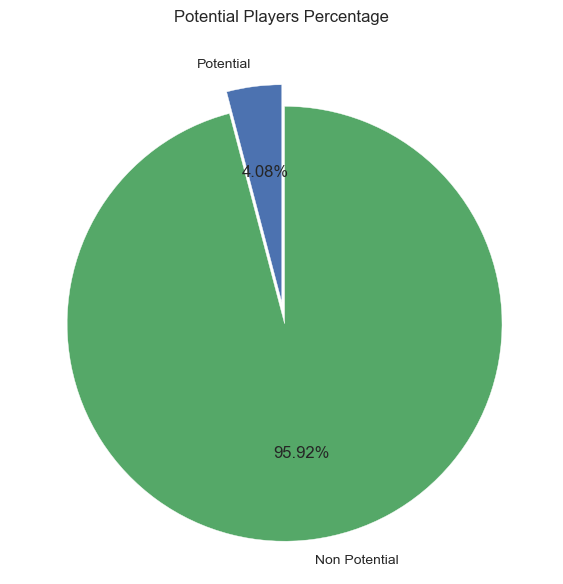

In [377]:
values = list(data_viz['potential_player'].value_counts().sort_values().values)
labels = list(data_viz['potential_player'].value_counts().sort_values().index)
explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels,explode=explode,
        startangle=90, autopct=lambda p:f'{p:.2f}%')
plt.title('Potential Players Percentage')
plt.tight_layout()
plt.show()

### Dari pie chart di atas diketahui bahwa hanya 4.08% pemain yang potensial sedangkan 95.92% sisanya tidak potensial

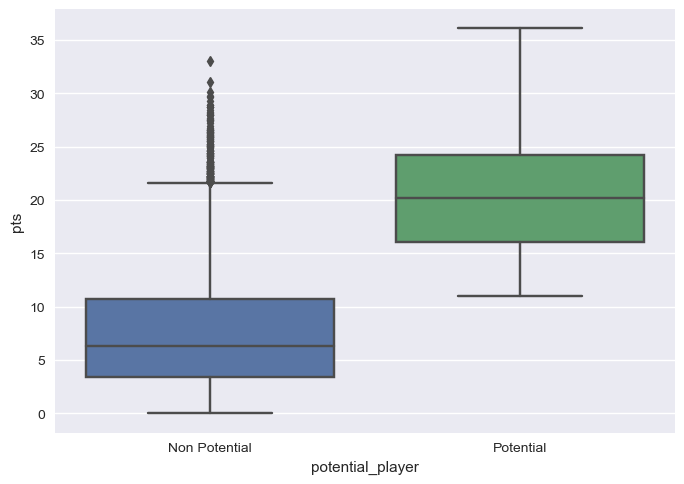

In [378]:
sns.boxplot(x='potential_player',y='pts',data=data_viz)
plt.show()

### Dapat dilihat pada boxplot diatas bahwa mayoritas pemain yang tidak potensial memiliki nilai `pts` yang lebih rendah dibandingkan dengan pemain yang potensial

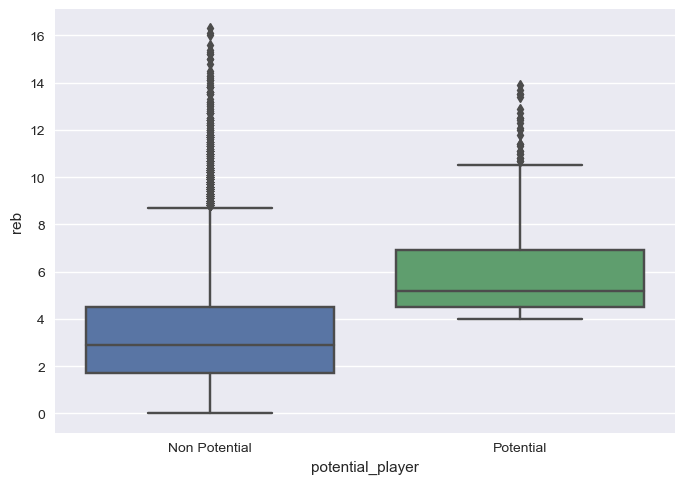

In [379]:
sns.boxplot(x='potential_player',y='reb',data=data_viz)
plt.show()

### Dapat dilihat pada boxplot diatas bahwa mayoritas pemain yang tidak potensial memiliki kisaran nilai `reb` yang lebih rendah dibandingkan dengan pemain yang potensial

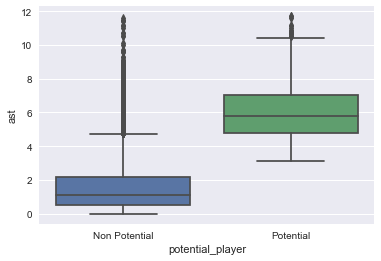

In [480]:
sns.boxplot(x='potential_player',y='ast',data=data_viz)
plt.show()

### Dapat dilihat pada boxplot diatas bahwa mayoritas pemain yang tidak potensial memiliki kisaran nilai `ast` yang lebih rendah dibandingkan dengan pemain yang potensial

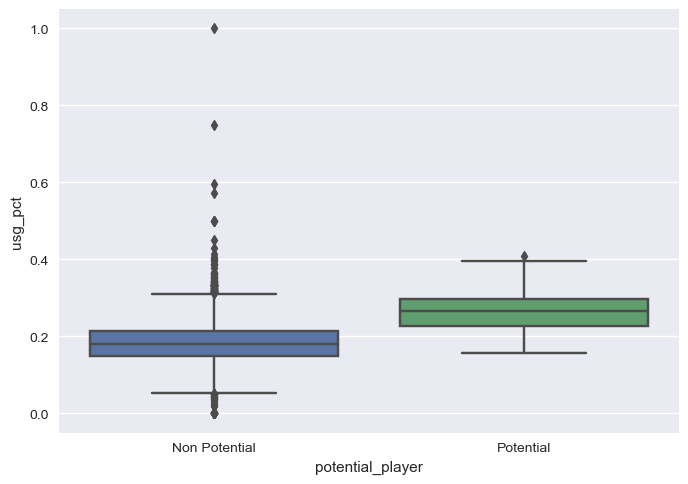

In [380]:
sns.boxplot(x='potential_player',y='usg_pct',data=data_viz)
plt.show()

### Dapat dilihat pada boxplot diatas bahwa mayoritas pemain yang tidak potensial memiliki kisaran nilai `usg_pct` yang lebih rendah dibandingkan dengan pemain yang potensial

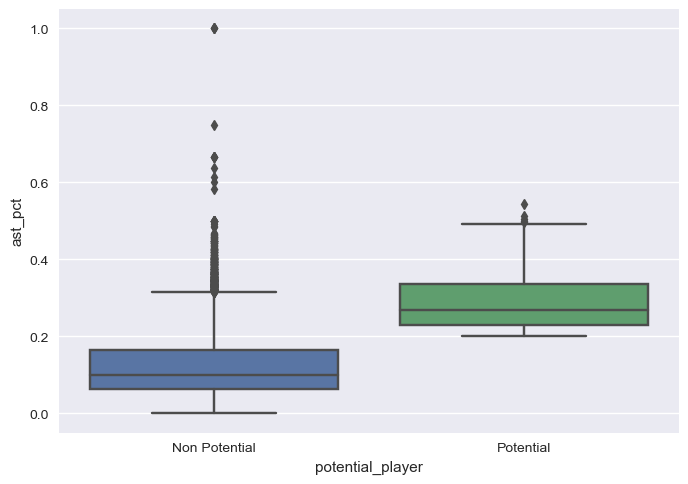

In [381]:
sns.boxplot(x='potential_player',y='ast_pct',data=data_viz)
plt.show()

### Dapat dilihat pada boxplot diatas bahwa mayoritas pemain yang tidak potensial memiliki kisaran nilai `ast_pct` yang lebih rendah dibandingkan dengan pemain yang potensial

# Model Optimization

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

In [383]:
target = data.potential_player
data.drop(['potential_player'], axis=1, inplace=True)

## Train Test Split Data Set

### Dalam melakukan train test split disini menggunakan test size = 0.2 dengan random state = 10

In [384]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.20, random_state=10)

## Classification Model

### Model klasifikasi yang digunakan ada 3 yaitu
1. Logistic Regression
- Logistic Regression bekerja dengan rumus Sigmoid Function
$\displaystyle sig(t) \hat{y} = \frac{1}{1+e^{-(mx+c)}}$, dengan nilai koefisien tiap variabel dan constanta dapat diperoleh menggunakan GLM (Generalized Linear Models)

2. Decission Tree Classifier
- Decission Tree memilki cara kerja dengan membuat pohon yang terdiri dari root, node dan leaf. Root, node dan leaf tersebut akan diisi dengan feature. Pemilihan fitur tersebut dihitung dengan metode gini dan entropy dengan nilai terkecil dari setiap fitur


3. Adaptive Boosting Classifier
- Adaptive Boosting Classifier bekerja dengan cara membuat Stump (yang terdiri dari 1 node dan 2 leaf) yang akan belajar dari kesalahan Stump yang sebelumnya

## 1. Logistic Regression

In [385]:
logreg = LogisticRegression()

In [386]:
# Best Grid HyperParameterTuning
logreg_grid = LogisticRegression()
logreg_grid.fit(X_train, y_train)

LogisticRegression()

In [387]:
param_grid_logreg = {
    'max_iter': [100, 200, 300],
}
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 300]}, scoring='roc_auc')

In [388]:
grid_search_logreg.best_params_

{'max_iter': 100}

In [389]:
logreg_grid = grid_search_logreg.best_estimator_

In [390]:
logreg_grid_pred = logreg_grid.predict(X_test)
logreg_grid_proba = logreg_grid.predict_proba(X_test)

In [391]:
logreg_grid_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [392]:
print(classification_report(y_test, logreg_grid_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2136
           1       0.69      0.51      0.58        93

    accuracy                           0.97      2229
   macro avg       0.83      0.75      0.78      2229
weighted avg       0.97      0.97      0.97      2229



In [393]:
tnlrc, fplrc, fnlrc, tplrc = confusion_matrix(y_test, logreg_grid_pred).ravel()
print(confusion_matrix(y_test, logreg_grid_pred))

[[2115   21]
 [  46   47]]


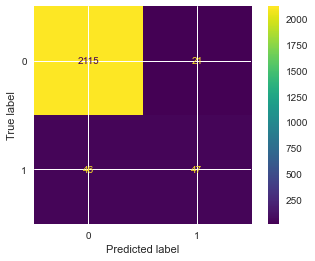

In [394]:
plot_confusion_matrix(logreg_grid, X_test, y_test)

In [395]:
logreg_prob = logreg_grid.predict_proba(X_test)
problogreg = logreg_prob[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, problogreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

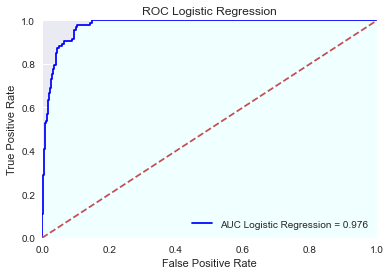

In [396]:
plt.title('ROC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg, tpr_logreg, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

## 2. Decision Tree Classifier

In [397]:
dtc = DecisionTreeClassifier()

In [398]:
# Best Decision Tree Hyperparameter Tuning
dtc_grid = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=20)
dtc_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=20)

In [399]:
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split': [2,5,10,20],
}
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='roc_auc')

In [400]:
grid_search_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}

In [401]:
dtc_grid = grid_search_dtc.best_estimator_

In [402]:
dtc_grid_pred = dtc_grid.predict(X_test)
dtc_grid_proba = dtc_grid.predict_proba(X_test)

In [403]:
dtc_grid_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [404]:
print(classification_report(y_test, dtc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.98      0.97      0.97        93

    accuracy                           1.00      2229
   macro avg       0.99      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [405]:
tndtc, fpdtc, fndtc, tpdtc = confusion_matrix(y_test, dtc_grid_pred).ravel()
print(confusion_matrix(y_test, dtc_grid_pred))

[[2134    2]
 [   3   90]]


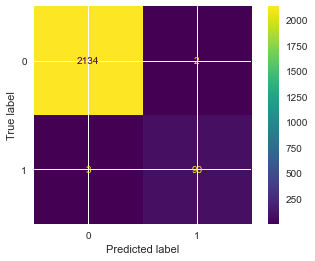

In [406]:
plot_confusion_matrix(dtc_grid, X_test, y_test)

In [407]:
dtc_prob = dtc_grid.predict_proba(X_test)
probdtc = dtc_prob[:,1]
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_test, probdtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

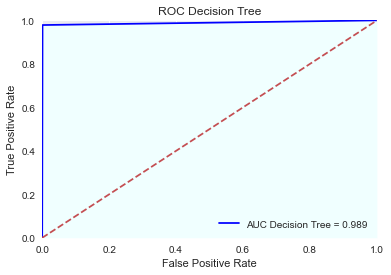

In [408]:
plt.title('ROC Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

## 3. Adaptive Boosting Classifier

In [409]:
abc = AdaBoostClassifier()

In [410]:
# Best Ada Boost Hyperparameter Tuning
abc_grid = AdaBoostClassifier(learning_rate=1.0, n_estimators=200)
abc_grid.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [411]:
param_grid_abc = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.5, 1.0, 2.0]
}
grid_search_abc = GridSearchCV(estimator=abc, param_grid=param_grid_abc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_abc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [412]:
grid_search_abc.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [413]:
abc_grid = grid_search_abc.best_estimator_

In [414]:
abc_grid_pred = abc_grid.predict(X_test)
abc_grid_proba = abc_grid.predict_proba(X_test)

In [415]:
print(classification_report(y_test, abc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.97      1.00      0.98        93

    accuracy                           1.00      2229
   macro avg       0.98      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [416]:
tnabc, fpabc, fnabc, tpabc = confusion_matrix(y_test, abc_grid_pred).ravel()
print(confusion_matrix(y_test, abc_grid_pred))

[[2133    3]
 [   0   93]]


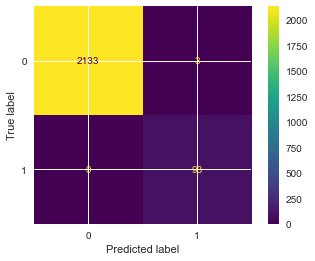

In [417]:
plot_confusion_matrix(abc_grid, X_test, y_test)

In [418]:
abc_prob = abc_grid.predict_proba(X_test)
probabc = abc_prob[:,1]
fpr_abc, tpr_abc, threshold_abc = roc_curve(y_test, probabc)
roc_auc_abc = auc(fpr_abc, tpr_abc)

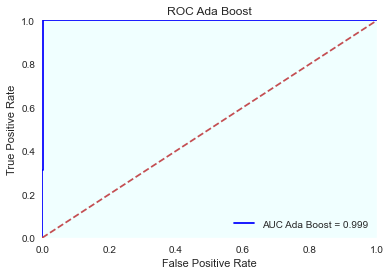

In [419]:
plt.title('ROC Ada Boost')
plt.plot(fpr_abc, tpr_abc, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc, tpr_abc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

In [471]:
modelComparation = pd.DataFrame({
    "Accuracy": [accuracy_score(y_test, logreg_grid_pred),accuracy_score(y_test, dtc_grid_pred),accuracy_score(y_test, abc_grid_pred)],
    "Precision Score": [precision_score(y_test, logreg_grid_pred),precision_score(y_test, dtc_grid_pred),precision_score(y_test, abc_grid_pred)],
    "Recall Score": [recall_score(y_test, logreg_grid_pred),recall_score(y_test, dtc_grid_pred),recall_score(y_test, abc_grid_pred)],
    "F1 Score": [f1_score(y_test, logreg_grid_pred),f1_score(y_test, dtc_grid_pred),f1_score(y_test, abc_grid_pred)],
    "AUC Score": [roc_auc_logreg,roc_auc_dtc,roc_auc_abc]
}, index=['Logistic Regression', 'Decision Tree', 'Ada Boost'])
modelComparation

,Accuracy,Precision Score,Recall Score,F1 Score,AUC Score
Logistic Regression,0.969942,0.691176,0.505376,0.583851,0.976421
Decision Tree,0.997757,0.978261,0.967742,0.972973,0.988754
Ada Boost,0.998654,0.968750,1.000000,0.984127,0.999154


### Diperoleh model terbaik dari tabel di atas yaitu Adaboost Classifier dengan nilai Accuracy, Precision Score	, Recall Score, F1 Score dan AUC Score tertinggi

### Namun karena jumlah data target yang tidak balance maka akan dilakukan SMOTE, Over Sampling dan Under Sampling untuk melihat apakah terdapat model yang lebih baik lagi

## 1. SMOTE

In [421]:
smote = SMOTE()
X_smo, y_smo = smote.fit_resample(X_train, y_train)

In [422]:
abc_grid_smo = AdaBoostClassifier(learning_rate=1.0, n_estimators=200)
abc_grid_smo.fit(X_smo, y_smo)

AdaBoostClassifier(n_estimators=200)

In [423]:
param_grid_abc = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.5, 1.0, 2.0]
}
grid_search_abc_smo = GridSearchCV(estimator=abc, param_grid=param_grid_abc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_abc_smo.fit(X_smo, y_smo)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [424]:
grid_search_abc_smo.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [425]:
abc_grid_smo = grid_search_abc.best_estimator_

In [426]:
abc_grid_pred_smo = abc_grid_smo.predict(X_test)
abc_grid_proba_smo = abc_grid_smo.predict_proba(X_test)

In [427]:
print(classification_report(y_test, abc_grid_pred_smo))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.97      1.00      0.98        93

    accuracy                           1.00      2229
   macro avg       0.98      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [428]:
tnabc_smo, fpabc_smo, fnabc_smo, tpabc_smo = confusion_matrix(y_test, abc_grid_pred_smo).ravel()
print(confusion_matrix(y_test, abc_grid_pred_smo))

[[2133    3]
 [   0   93]]


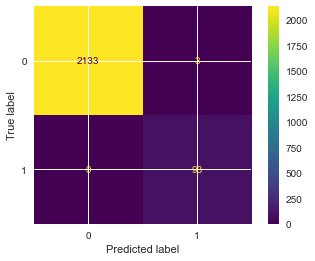

In [429]:
# plt.figure(figsize=(8,6))
plot_confusion_matrix(abc_grid_smo, X_test, y_test)

In [430]:
abc_prob_smo = abc_grid_smo.predict_proba(X_test)
probabc_smo = abc_prob_smo[:,1]
fpr_abc_smo, tpr_abc_smo, threshold_abc_smo = roc_curve(y_test, probabc_smo)
roc_auc_abc_smo = auc(fpr_abc_smo, tpr_abc_smo)

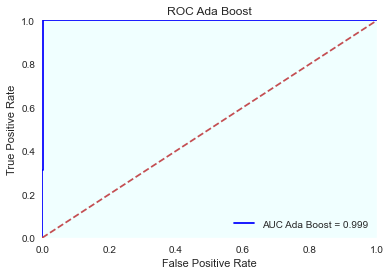

In [431]:
plt.title('ROC Ada Boost')
plt.plot(fpr_abc_smo, tpr_abc_smo, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc_smo,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc_smo, tpr_abc_smo, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

## 2. Over Sampling

In [432]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [433]:
abc_grid_ros = AdaBoostClassifier(learning_rate=1.0, n_estimators=200)
abc_grid_ros.fit(X_ros, y_ros)

AdaBoostClassifier(n_estimators=200)

In [434]:
param_grid_abc = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.5, 1.0, 2.0]
}
grid_search_abc_ros = GridSearchCV(estimator=abc, param_grid=param_grid_abc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_abc_ros.fit(X_ros, y_ros)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [435]:
grid_search_abc_ros.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [436]:
abc_grid_ros = grid_search_abc_ros.best_estimator_

In [437]:
abc_grid_pred_ros = abc_grid_ros.predict(X_test)
abc_grid_proba_ros = abc_grid_ros.predict_proba(X_test)

In [438]:
print(classification_report(y_test, abc_grid_pred_ros))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2136
           1       0.97      1.00      0.98        93

    accuracy                           1.00      2229
   macro avg       0.98      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [439]:
tnabc_ros, fpabc_ros, fnabc_ros, tpabc_ros = confusion_matrix(y_test, abc_grid_pred_ros).ravel()
print(confusion_matrix(y_test, abc_grid_pred_ros))

[[2133    3]
 [   0   93]]


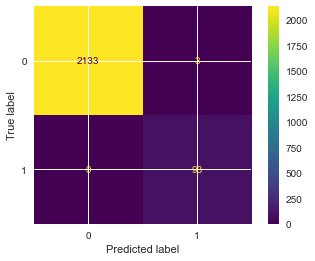

In [440]:
plot_confusion_matrix(abc_grid_ros, X_test, y_test)

In [441]:
abc_prob_ros = abc_grid_ros.predict_proba(X_test)
probabc_ros = abc_prob_ros[:,1]
fpr_abc_ros, tpr_abc_ros, threshold_abc_ros = roc_curve(y_test, probabc_ros)
roc_auc_abc_ros = auc(fpr_abc_ros, tpr_abc_ros)

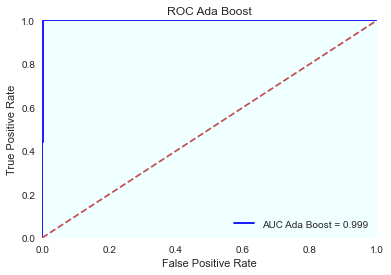

In [442]:
plt.title('ROC Ada Boost')
plt.plot(fpr_abc_ros, tpr_abc_ros, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc_ros,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc_ros, tpr_abc_ros, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

## 3. Under Sampling

In [443]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [444]:
abc_grid_rus = AdaBoostClassifier(learning_rate=1.0, n_estimators=200)
abc_grid_rus.fit(X_rus, y_rus)

AdaBoostClassifier(n_estimators=200)

In [445]:
param_grid_abc = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.5, 1.0, 2.0]
}
grid_search_abc_rus = GridSearchCV(estimator=abc, param_grid=param_grid_abc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_abc_rus.fit(X_rus, y_rus)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [446]:
grid_search_abc_rus.best_params_

{'learning_rate': 0.5, 'n_estimators': 50}

In [447]:
abc_grid_rus = grid_search_abc_rus.best_estimator_

In [448]:
abc_grid_pred_rus = abc_grid_rus.predict(X_test)
abc_grid_proba_rus = abc_grid_rus.predict_proba(X_test)

In [449]:
print(classification_report(y_test, abc_grid_pred_rus))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2136
           1       0.88      1.00      0.93        93

    accuracy                           0.99      2229
   macro avg       0.94      1.00      0.97      2229
weighted avg       0.99      0.99      0.99      2229



In [450]:
tnabc_rus, fpabc_rus, fnabc_rus, tpabc_rus = confusion_matrix(y_test, abc_grid_pred_rus).ravel()
print(confusion_matrix(y_test, abc_grid_pred_rus))

[[2123   13]
 [   0   93]]


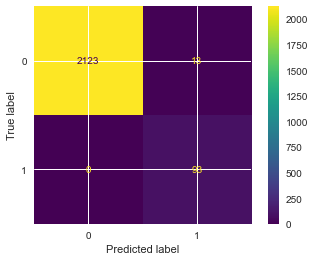

In [451]:
plot_confusion_matrix(abc_grid_rus, X_test, y_test)

In [452]:
abc_prob_rus = abc_grid_rus.predict_proba(X_test)
probabc_rus = abc_prob_rus[:,1]
fpr_abc_rus, tpr_abc_rus, threshold_abc_rus = roc_curve(y_test, probabc_rus)
roc_auc_abc_rus = auc(fpr_abc_rus, tpr_abc_rus)

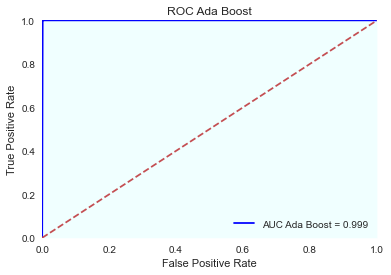

In [453]:
plt.title('ROC Ada Boost')
plt.plot(fpr_abc_rus, tpr_abc_rus, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc_rus,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc_rus, tpr_abc_rus, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

In [454]:
modelComparation2 = pd.DataFrame({
    "Accuracy": [accuracy_score(y_test, abc_grid_pred),accuracy_score(y_test, abc_grid_pred_smo),accuracy_score(y_test, abc_grid_pred_ros),accuracy_score(y_test, abc_grid_pred_rus)],
    "Precision Score": [precision_score(y_test, abc_grid_pred),precision_score(y_test, abc_grid_pred_smo),precision_score(y_test, abc_grid_pred_ros),precision_score(y_test, abc_grid_pred_rus)],
    "Recall Score": [recall_score(y_test, abc_grid_pred),recall_score(y_test, abc_grid_pred_smo),recall_score(y_test, abc_grid_pred_ros),recall_score(y_test, abc_grid_pred_rus)],
    "F1 Score": [f1_score(y_test, abc_grid_pred),f1_score(y_test, abc_grid_pred_smo),f1_score(y_test, abc_grid_pred_ros),f1_score(y_test, abc_grid_pred_rus)],
    "AUC Score": [roc_auc_abc,roc_auc_abc_smo,roc_auc_abc_ros,roc_auc_abc_rus]
}, index=['Ada Boost','Ada Boost SMOTE','Ada Boost Over Sampling','Ada Boost Under Sampling'])

In [455]:
modelComparation2

,Accuracy,Precision Score,Recall Score,F1 Score,AUC Score
Ada Boost,0.998654,0.968750,1.0,0.984127,0.999154
Ada Boost SMOTE,0.998654,0.968750,1.0,0.984127,0.999154
Ada Boost Over Sampling,0.998654,0.968750,1.0,0.984127,0.999184
Ada Boost Under Sampling,0.994168,0.877358,1.0,0.934673,0.999290


### Dari komparasi model di atas diperoleh model yang terbaik adalah `Ada Boost Over Sampling`

### Dalam kasus ini difokuskan untuk mengurangi probabilitas model melakukan False Positive (Sebenarnya pemain tidak berpotensi, namun terprediksi berpotensi)
- Karena Club hanya menginginkan pemain yang sebenarnya berpotensi dan terprediksi berpotensi juga
- Karena jika Club mendapatkan pemain yang tidak berpotensi, namun terprediksi berpotensi maka Club akan mengalami kerugian yang dapat mengakibatkan menurunnya performa Club dalam kompetisi 

# Peningkatan Performa

### Agar pemain yang tidak berpotensi, namun terprediksi berpotensi tidak akan direkrut maka dicari nilai fpr = 0 dengan nilai tpr tertinggi

In [456]:
thres_abc = pd.DataFrame({'thres': threshold_abc_ros, 'tpr': tpr_abc_ros, 'fpr': fpr_abc_ros})
thres_abc

,thres,tpr,fpr
0,1.628905,0.000000,0.000000
1,0.628905,0.010753,0.000000
2,0.605742,0.075269,0.000000
3,0.604268,0.096774,0.000000
4,0.602652,0.118280,0.000000
...,...,...,...
185,0.143315,1.000000,0.987828
186,0.142336,1.000000,0.992041
187,0.142244,1.000000,0.992509
188,0.138510,1.000000,0.997191


In [457]:
thres_abc[thres_abc['fpr']==0]

,thres,tpr,fpr
0,1.628905,0.000000,0.0
1,0.628905,0.010753,0.0
2,0.605742,0.075269,0.0
3,0.604268,0.096774,0.0
4,0.602652,0.118280,0.0


In [458]:
thres_abc['thres'][4]

0.6026517453155601

In [459]:
abc_pred_06 = [0 if x < 0.6054222195718353 else 1 for x in probabc_ros]
confusion_matrix(y_test, abc_pred_06)

array([[2136,    0],
       [  86,    7]], dtype=int64)

# Predict Data new_players

In [460]:
new = pd.read_csv('C:\\Users\Lenovo\Downloads\\new_players.csv')
new.drop(['Unnamed: 0'], axis=1, inplace=True)
new.head()

,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [461]:
abc_prob_new = abc_grid_ros.predict_proba(new[data.columns])

In [462]:
probabc_new = abc_prob_new[:,1]
new_pred = [0 if x < 0.6054222195718353 else 1 for x in probabc_new]
new['potential_player'] = new_pred

In [463]:
new

,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0
1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0
2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,0
3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0
4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0
496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0
497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0
498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0


In [464]:
print(f"Jumlah pemain yang berpotensi sebanyak {len(new[new['potential_player']==1])}")

Jumlah pemain yang berpotensi sebanyak 0


# Tidak ada pemain yang berpotensi